In [1]:
# Importing the dataset on http://archive.ics.uci.edu/ml/datasets/Adult by manually downloading it as
# importing in python was not offered by ucirepo for id = 2
import zipfile
import pandas as pd

# Specify the path to your zip file
zip_file_path = 'Downloads/adult.zip'

# Extract the contents of the zip file'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('extracted_data')

# Define the paths to the extracted files
data_file_path = 'extracted_data/adult.data'
test_file_path = 'extracted_data/adult.test'

# Read the .data file into a pandas dataframe for features (X)
dataset = pd.read_csv(data_file_path, header=None)  # Adjust header if needed
# manually copied names from the "additional information section on the website"
lines = """
age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
income: >50K, <=50K
"""

lines = lines.split("\n")
column_names = [line.split(':')[0] for line in lines if ':' in line]
print(column_names)

# Assign column names to the train and test sets
dataset.columns = column_names

# reading test data and assigning column names
test = pd.read_csv(test_file_path, header=None, skiprows=1)
test.columns = column_names

['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']


In [3]:
dataset

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
test

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [8]:
import pandas as pd


def one_hot_encode_discrete_features(df, discrete_columns):
    # Create a copy of the original DataFrame to avoid modifying it
    df_encoded = df.copy()
    
    # Iterate over each discrete feature column and perform one-hot encoding
    for column in discrete_columns:
        unique_values = df[column].unique()
        
        # Check if the column has only two unique values (binary feature)
        if len(unique_values) == 2:
            # Use pandas get_dummies to create one-hot encoded columns
            one_hot_encoded = pd.get_dummies(df[column], prefix=column, drop_first=True)
        else:
            # For columns with more than two unique values, perform regular one-hot encoding
            one_hot_encoded = pd.get_dummies(df[column], prefix=column)
        
        # Drop the original column and concatenate the one-hot encoded columns
        df_encoded = pd.concat([df_encoded, one_hot_encoded], axis=1)
        
        # Remove the original discrete feature column from the DataFrame
        df_encoded.drop(column, axis=1, inplace=True)
    
    return df_encoded


# List of continuous and non continuous feature column names
continuous = ["age","fnlwgt","education-num","capital-gain","capital-loss","hours-per-week"]
non_continuous_columns = [col for col in dataset.columns if col not in continuous]
# Perform one-hot encoding on discrete features
dataset_encoded = one_hot_encode_discrete_features(dataset, non_continuous_columns)
# Display the resulting DataFrame with one-hot encoded columns
dataset_encoded

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
32557,40,154374,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
32558,58,151910,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
32559,22,201490,9,0,0,20,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [9]:
import pandas as pd
import numpy as np

# discrete, continuous list
def handle_missing_values(dataset, continuous_col_names, train_set = True, threshold=0.3):
    """
    handles missing values depending on data type of features and type of dataset it is.
    If it is training set, then after encoding, the nan columns need to be removed. But if it's 
    va, or test set, the same column that are chosen in train set need to be taken, so we can't drop 
    any columns from these, they need to be handled differently later
    """
    if train_set == True:
    # this is train set
        # for discrete nan values-
        columns = dataset.columns
        for col_name in columns:
            if "?" in col_name:
                print("missing values found in  ",col_name)
                dataset = dataset.drop(columns=[col_name])
    else:
    # this is test set
        pass
            
    # Determine data type of each column
    column_types = dataset.dtypes
    
    # Identify columns with missing values and calculate the percentage of missing values
    cont_dataset = dataset[continuous]
    missing_values = cont_dataset.isnull().sum()
    missing_percentage = (missing_values / len(dataset)) * 100
    print(missing_percentage)
    
    # Initialize an empty DataFrame for the cleaned dataset
    df_cleaned = dataset.copy()
    
    # Iterate through columns to handle missing values
    for column in continuous_col_names:
        # Check if the column has missing values
        if missing_values[column] > 0:
            # Determine the data type of the column
            data_type = column_types[column]
            
            # If the missing value percentage exceeds the threshold, drop the column
            if missing_percentage[column] > threshold * 100:
                df_cleaned.drop(column, axis=1, inplace=True)
            else:
                # Choose an imputation method based on data type
                if np.issubdtype(data_type, np.number):
                    # For numeric (continuous) columns, fill missing values with the median
                    df_cleaned[column].fillna(dataset[column].median(), inplace=True)

     
    return df_cleaned
dataset_encoded = handle_missing_values(dataset_encoded,continuous)
dataset_encoded

missing values found in   workclass_ ?
missing values found in   occupation_ ?
missing values found in   native-country_ ?
age               0.0
fnlwgt            0.0
education-num     0.0
capital-gain      0.0
capital-loss      0.0
hours-per-week    0.0
dtype: float64


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
32557,40,154374,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
32558,58,151910,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
32559,22,201490,9,0,0,20,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [10]:
from sklearn.model_selection import train_test_split

def split_dataset(df, target_col_name, test_ratio=0.2, random_state=None):
    """
    Split a DataFrame into training and validation sets.
    """
    # Split the dataset into features (X) and the target variable (y)
    X = df.drop(columns=[target_col_name])  
    y = df[[target_col_name]] 
    y = y.squeeze()  
    y = y.astype(int) 
    
    # Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_ratio, random_state=random_state)

    return X_train, X_val, y_train, y_val


import pandas as pd

# Specify the test ratio (e.g., 20% for validation)
test_ratio = 0.20
target_col_name = "income_ >50K"
# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = split_dataset(dataset_encoded, test_ratio=test_ratio, target_col_name = target_col_name, random_state=42)

# Now you have X_train, X_val (features) and y_train, y_val (target) for training and validation.


In [13]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import pickle

def normalize_continuous_features(data, continuous, save_scalers_to=None):
    """
    performs column wise normalization and saves scales for each column so that they can be used later
    to scale the test and val sets
    """
    normalized_data = data.copy()
    scalers = {}
    # normalize each specified continuous column separately
    for column in continuous:
        # initialize a scaler for the current feature
        scaler = MinMaxScaler()
        # normalize the current feature and store it in the DataFrame
        normalized_data[column] = scaler.fit_transform(normalized_data[[column]])
        # store the scaler in the dictionary with the feature name as the key
        scalers[column] = scaler

    # save scalers to a file
    if save_scalers_to:
        with open(save_scalers_to, 'wb') as file:
            pickle.dump(scalers, file)

    return normalized_data

def load_scalers(scaler_file):
    # Load scalers from the specified file
    with open(scaler_file, 'rb') as file:
        scalers = pickle.load(file)
    return scalers


# normalize the continuous features and save the scalers to a file
X_train = normalize_continuous_features(X_train, continuous, save_scalers_to='scalers.pkl')
# load the scalers from the file
loaded_scalers = load_scalers('scalers.pkl')

In [14]:
X_train

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
5514,0.219178,0.126253,0.800000,0.0,0.000000,0.500000,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
19777,0.260274,0.050376,0.666667,0.0,0.433196,0.500000,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
10781,0.561644,0.129551,0.266667,0.0,0.000000,0.397959,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32240,0.054795,0.114033,0.666667,0.0,0.000000,0.459184,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
9876,0.136986,0.181733,0.600000,0.0,0.000000,0.397959,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,0.410959,0.235786,0.800000,0.0,0.000000,0.397959,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5390,0.191781,0.091638,0.466667,0.0,0.000000,0.204082,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
860,0.013699,0.138547,0.400000,0.0,0.000000,0.193878,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
15795,0.452055,0.028508,0.533333,0.0,0.000000,0.846939,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [15]:
y_train

5514     1
19777    1
10781    0
32240    0
9876     0
        ..
29802    0
5390     0
860      0
15795    0
23654    0
Name: income_ >50K, Length: 26048, dtype: int32

In [ ]:
"""
Our dataset contains 104 columns, so some feature selection and/or dimensionality should be applied
"""

In [16]:

# FEATURE SELECTION
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA

# Variance Threshold
def variance_threshold_selection(X,k, threshold=0.01):
    from sklearn.feature_selection import VarianceThreshold
    selector = VarianceThreshold(threshold=threshold)
    X_selected = selector.fit_transform(X)
    selected_feature_indices = selector.get_support(indices=True)
    selected_feature_names = [X.columns[i] for i in selected_feature_indices]
    return selected_feature_names[:k]

# Univariate Feature Selection (Chi-squared for discrete features)
def univariate_chi2_selection(X_discrete, Y, k=10):
    selector_discrete = SelectKBest(score_func=chi2, k=k)
    selector_discrete.fit(X_discrete, Y)
    selected_feature_indices = selector_discrete.get_support(indices=True)
    selected_feature_names = [X_discrete.columns[i] for i in selected_feature_indices]
    return selected_feature_names

# Tree-Based Feature Importance
def tree_based_feature_importance(X, Y, k, n_estimators=100):
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf_classifier.fit(X, Y)
    feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_classifier.feature_importances_})
    selected_feature_names = feature_importances.sort_values(by='Importance', ascending=False).head(k)['Feature'].tolist()
    return selected_feature_names

# Lasso (L1 Regularization)
def lasso_selection(X, Y, C=1.0, num_features=10):
    lasso = LogisticRegression(penalty='l1', C=C, solver='liblinear')
    lasso.fit(X, Y)
    
    if num_features is None:
        # If num_features is not specified, select all non-zero coefficient features
        selected_feature_indices = [i for i, coef in enumerate(lasso.coef_[0]) if coef != 0]
    else:
        # Select the top 'num_features' features based on absolute coefficient values
        coef_abs = abs(lasso.coef_[0])
        selected_feature_indices = np.argsort(coef_abs)[-num_features:]
    
    selected_feature_names = X.columns[selected_feature_indices]
    return selected_feature_names

# Recursive Feature Elimination (RFE)
def rfe_selection(X, Y, n_features_to_select=10):
    model = LogisticRegression(solver='lbfgs', max_iter=1000)
    rfe = RFE(model, n_features_to_select=n_features_to_select)
    rfe.fit(X, Y)
    selected_feature_indices = [i for i, is_selected in enumerate(rfe.support_) if is_selected]
    selected_feature_names = X.columns[selected_feature_indices]
    return selected_feature_names


In [17]:
continuous = ["age","fnlwgt","education-num","capital-gain","capital-loss","hours-per-week"]
non_continuous_columns = [col for col in X_train.columns if col not in continuous]
X_discrete = X_train[non_continuous_columns]
X_continuous = X_train[continuous]

# Example usage of each feature selection function:
from sklearn.feature_selection import VarianceThreshold
feature_list = []

# Variance Threshold
selected_features_variance = variance_threshold_selection(X_train,k=10, threshold=0.01)
print("Selected features using Variance Threshold:",selected_features_variance)
feature_list.extend(selected_features_variance)

# Univariate Chi-squared Selection (for discrete features)
discrete_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
selected_features_chi2 = univariate_chi2_selection(X_discrete, y_train, k=10)
print("\nSelected features using Univariate Chi-squared Selection:",selected_features_chi2)
feature_list.extend(selected_features_chi2)

# Tree-Based Feature Importance
selected_features_rf = tree_based_feature_importance(X_train, y_train, k = 10, n_estimators=100)
print("\nSelected features using Tree-Based Feature Importance:",selected_features_rf)
feature_list.extend(selected_features_rf)


# Lasso (L1 Regularization)
selected_features_lasso = lasso_selection(X_train, y_train, C=1.0, num_features=10)
print("\nSelected top num_features features using Lasso (L1 Regularization):",selected_features_lasso)
feature_list.extend(selected_features_lasso)

# Recursive Feature Elimination (RFE)
selected_features_rfe = rfe_selection(X_train, y_train, n_features_to_select=10)
print("\nSelected features using Recursive Feature Elimination (RFE):",selected_features_rfe)
feature_list.extend(selected_features_rfe)



Selected features using Variance Threshold: ['age', 'education-num', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'education_ 10th']

Selected features using Univariate Chi-squared Selection: ['education_ Bachelors', 'education_ Masters', 'education_ Prof-school', 'marital-status_ Married-civ-spouse', 'marital-status_ Never-married', 'occupation_ Exec-managerial', 'occupation_ Prof-specialty', 'relationship_ Husband', 'relationship_ Not-in-family', 'relationship_ Own-child']

Selected features using Tree-Based Feature Importance: ['fnlwgt', 'age', 'capital-gain', 'hours-per-week', 'marital-status_ Married-civ-spouse', 'education-num', 'relationship_ Husband', 'capital-loss', 'marital-status_ Never-married', 'occupation_ Exec-managerial']

Selected top num_features features using Lasso (L1 Regularization): Index(['native-country_ Columbia', 'occupation_ Priv-hou

In [18]:
feature_list

['age',
 'education-num',
 'hours-per-week',
 'workclass_ Federal-gov',
 'workclass_ Local-gov',
 'workclass_ Private',
 'workclass_ Self-emp-inc',
 'workclass_ Self-emp-not-inc',
 'workclass_ State-gov',
 'education_ 10th',
 'education_ Bachelors',
 'education_ Masters',
 'education_ Prof-school',
 'marital-status_ Married-civ-spouse',
 'marital-status_ Never-married',
 'occupation_ Exec-managerial',
 'occupation_ Prof-specialty',
 'relationship_ Husband',
 'relationship_ Not-in-family',
 'relationship_ Own-child',
 'fnlwgt',
 'age',
 'capital-gain',
 'hours-per-week',
 'marital-status_ Married-civ-spouse',
 'education-num',
 'relationship_ Husband',
 'capital-loss',
 'marital-status_ Never-married',
 'occupation_ Exec-managerial',
 'native-country_ Columbia',
 'occupation_ Priv-house-serv',
 'age',
 'marital-status_ Married-civ-spouse',
 'marital-status_ Married-AF-spouse',
 'capital-loss',
 'hours-per-week',
 'education_ Preschool',
 'education-num',
 'capital-gain',
 'age',
 'educa

In [19]:
from collections import Counter

# selecting the 5 most commonly occurring feature names

k = 5
# use Counter to count occurrences
element_counts = Counter(feature_list)
print(element_counts)
# get the unique elements in the order of frequency (most common first)
selected_features = [element for element, _ in element_counts.most_common()][:k]
print(selected_features)
print(len(selected_features))


Counter({'age': 4, 'education-num': 4, 'hours-per-week': 4, 'marital-status_ Married-civ-spouse': 4, 'capital-gain': 3, 'capital-loss': 3, 'marital-status_ Never-married': 2, 'occupation_ Exec-managerial': 2, 'relationship_ Husband': 2, 'native-country_ Columbia': 2, 'occupation_ Priv-house-serv': 2, 'marital-status_ Married-AF-spouse': 2, 'workclass_ Federal-gov': 1, 'workclass_ Local-gov': 1, 'workclass_ Private': 1, 'workclass_ Self-emp-inc': 1, 'workclass_ Self-emp-not-inc': 1, 'workclass_ State-gov': 1, 'education_ 10th': 1, 'education_ Bachelors': 1, 'education_ Masters': 1, 'education_ Prof-school': 1, 'occupation_ Prof-specialty': 1, 'relationship_ Not-in-family': 1, 'relationship_ Own-child': 1, 'fnlwgt': 1, 'education_ Preschool': 1, 'occupation_ Farming-fishing': 1})
['age', 'education-num', 'hours-per-week', 'marital-status_ Married-civ-spouse', 'capital-gain']
5


In [ ]:
"""
Before applying dimensionality reduction, we need to check if this will be appropriate and effective for
the nature of data present in our dataset
"""

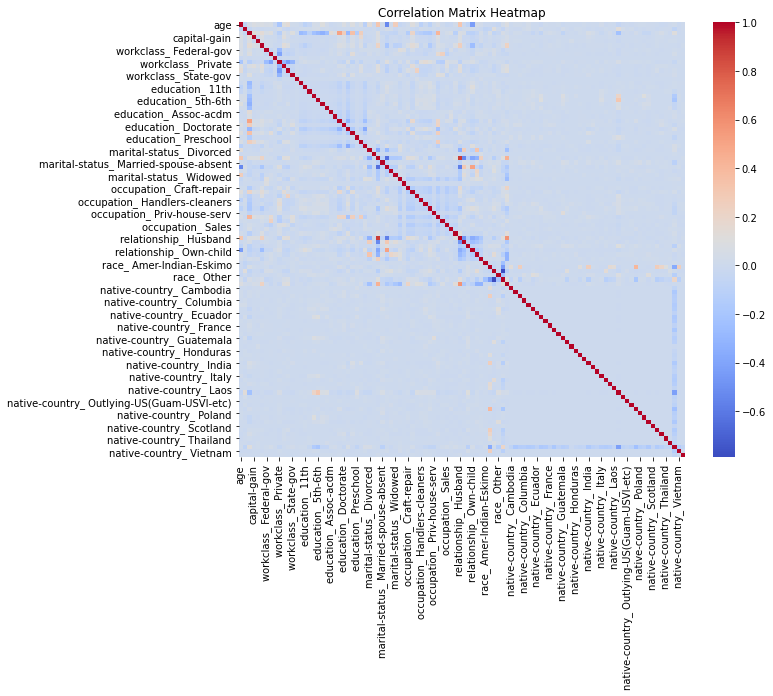

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
your_data = X_train
# calculate the correlation matrix
correlation_matrix = your_data.corr()

# create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False)
plt.title("Correlation Matrix Heatmap")
plt.show()
# observation: the map shows very low correlation between features

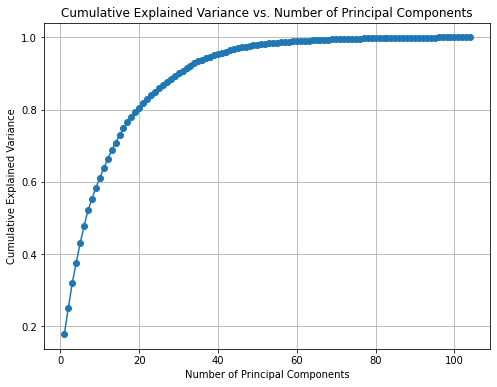

In [21]:
from sklearn.decomposition import PCA

# Fit PCA to your data
pca = PCA()
pca.fit(your_data)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance vs. Number of Principal Components")
plt.grid()
plt.show()
# observation: this curve implies that we need to take at least 40 principal components to capture ~90%
# variance in data

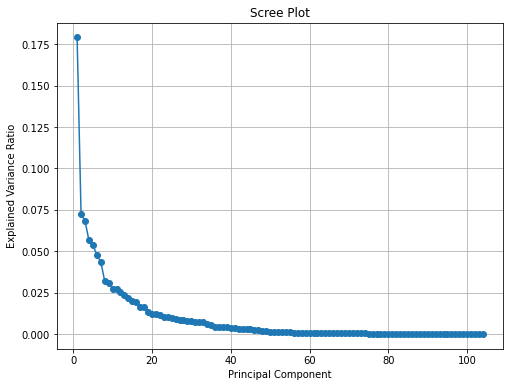

In [22]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot")
plt.grid()
plt.show()
# observation: in a scree plot, we need to find an elbow point that corresponds to a very low EVR (<0.001).
# As can be seen, this point is not clear enough

In [ ]:
# all 3 observations point to the fact that dimensionality reduction might not be a good idea. 
# so I've only applied feature selection to X_train

In [23]:
X_train_transformed = X_train[selected_features].values

In [24]:
# test data transform

# list of continuous and non continuous feature column names
continuous = ["age","fnlwgt","education-num","capital-gain","capital-loss","hours-per-week"]
non_continuous_columns = [col for col in dataset.columns if col not in continuous]

# function to apply the same scales to val and test X data
def transform_X_test(X_test,selected_features):
    scaled_test_data = X_test.copy()
    for column in scaled_test_data.columns:
        if column in loaded_scalers:
            scaler = loaded_scalers[column]
            scaled_column = scaler.transform(scaled_test_data[[column]])
            scaled_test_data[column] = scaled_column
    X_test = scaled_test_data[selected_features].values
    return X_test
    
X_val_transformed = transform_X_test(X_val,selected_features)


In [25]:
X_train_transformed.shape, y_train.shape

((26048, 5), (26048,))

In [26]:
X_val_transformed.shape, y_val.shape

((6513, 5), (6513,))

In [42]:
# to adhere to naming convention-
X_train, X_val, y_train, y_val = X_train_transformed,X_val_transformed,y_train,y_val

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# create a Logistic Regression model
logistic_model = LogisticRegression(random_state=42)
# fit the model on the training data
logistic_model.fit(X_train, y_train)


# Predict on the validation set (optional)
y_pred = logistic_model.predict(X_val)
# pvaluate the model (optional)
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.8350990327038231


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# create a Random Forest Classifier model
rf_model = RandomForestClassifier(random_state=42)
# Fit the model on the training data
rf_model.fit(X_train, y_train)


# predict on the validation set (optional)
y_pred = rf_model.predict(X_val)
# evaluate the model (optional)
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.8344848764010441


In [29]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# create an SVM Classifier model
svm_model = SVC(kernel='rbf', random_state=42,probability = True)  # You can choose different kernels (e.g., 'linear', 'rbf', 'poly', etc.)

# fit the model on the training data
svm_model.fit(X_train, y_train)

# predict on the validation set (optional)
y_pred = svm_model.predict(X_val)
# evaluate the model (optional)
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.8453861507753724


In [30]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# create an XGBoost classifier model
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# fit the model on the training data
xgb_model.fit(X_train_transformed, y_train)

# predict on the validation set (optional)
y_pred = xgb_model.predict(X_val_transformed)
# evaluate the model (optional)
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)


Validation Accuracy: 0.8542914171656687


In [31]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# create a sequential neural network model
NN_model = keras.Sequential([
    # input layer (specify input shape)
    keras.layers.Input(shape=(X_train.shape[1],)),
    
    # hidden layers (you can customize the number of layers and units)
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    
    # output layer with 1 unit (binary classification) and sigmoid activation
    keras.layers.Dense(1, activation='sigmoid')
])

# compile the model
NN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# train the model on the training data
NN_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))  # You can adjust the number of epochs and batch size

Epoch 1/10
407/407 [==============================] - 1s 2ms/step - loss: 0.4021 - accuracy: 0.8167 - val_loss: 0.3414 - val_accuracy: 0.8440
Epoch 2/10
407/407 [==============================] - 1s 2ms/step - loss: 0.3401 - accuracy: 0.8403 - val_loss: 0.3328 - val_accuracy: 0.8446
Epoch 3/10
407/407 [==============================] - 1s 2ms/step - loss: 0.3378 - accuracy: 0.8394 - val_loss: 0.3318 - val_accuracy: 0.8452
Epoch 4/10
407/407 [==============================] - 1s 2ms/step - loss: 0.3360 - accuracy: 0.8417 - val_loss: 0.3294 - val_accuracy: 0.8457
Epoch 5/10
407/407 [==============================] - 1s 2ms/step - loss: 0.3344 - accuracy: 0.8430 - val_loss: 0.3281 - val_accuracy: 0.8457
Epoch 6/10
407/407 [==============================] - 1s 1ms/step - loss: 0.3338 - accuracy: 0.8417 - val_loss: 0.3334 - val_accuracy: 0.8415
Epoch 7/10
407/407 [==============================] - 1s 2ms/step - loss: 0.3336 - accuracy: 0.8408 - val_loss: 0.3300 - val_accuracy: 0.8455
Epoch 

model =  LogisticRegression(random_state=42)
              precision    recall  f1-score   support

     Class 0       0.86      0.93      0.90      4942
     Class 1       0.71      0.54      0.61      1571

    accuracy                           0.84      6513
   macro avg       0.78      0.74      0.75      6513
weighted avg       0.83      0.84      0.83      6513

Model: Logistic Regression
Accuracy: 0.8351
ROC AUC: 0.8894
Classification Report:
 {'Class 0': {'precision': 0.8647680120709166, 'recall': 0.9277620396600567, 'f1-score': 0.8951581413510348, 'support': 4942}, 'Class 1': {'precision': 0.7052023121387283, 'recall': 0.5436028007638447, 'f1-score': 0.6139468008626887, 'support': 1571}, 'accuracy': 0.8350990327038231, 'macro avg': {'precision': 0.7849851621048225, 'recall': 0.7356824202119507, 'f1-score': 0.7545524711068617, 'support': 6513}, 'weighted avg': {'precision': 0.8262791874749595, 'recall': 0.8350990327038231, 'f1-score': 0.8273271854309993, 'support': 6513}}


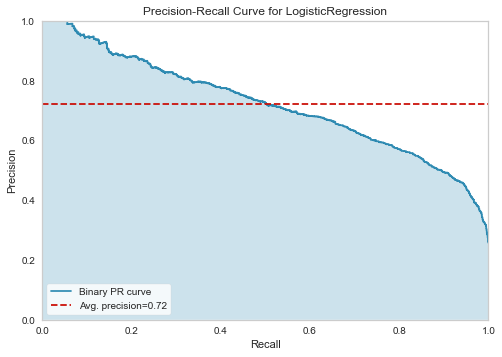

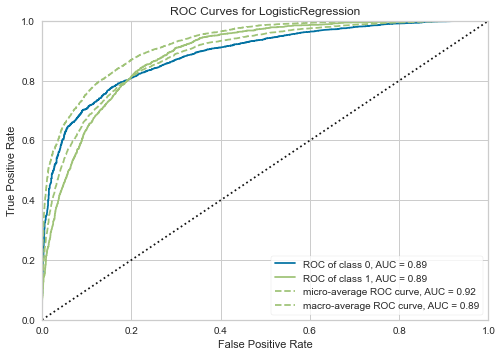

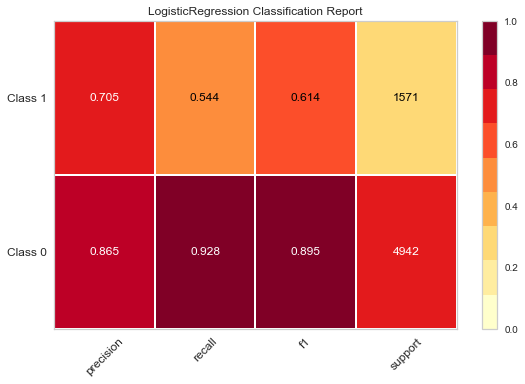

model =  RandomForestClassifier(random_state=42)
              precision    recall  f1-score   support

     Class 0       0.87      0.91      0.89      4942
     Class 1       0.68      0.58      0.63      1571

    accuracy                           0.83      6513
   macro avg       0.78      0.75      0.76      6513
weighted avg       0.83      0.83      0.83      6513

Model: Random Forest
Accuracy: 0.8345
ROC AUC: 0.8752
Classification Report:
 {'Class 0': {'precision': 0.8735498839907193, 'recall': 0.9142047753945771, 'f1-score': 0.8934150682222662, 'support': 4942}, 'Class 1': {'precision': 0.6838180462341537, 'recall': 0.5837046467218332, 'f1-score': 0.6298076923076923, 'support': 1571}, 'accuracy': 0.8344848764010441, 'macro avg': {'precision': 0.7786839651124364, 'recall': 0.7489547110582051, 'f1-score': 0.7616113802649793, 'support': 6513}, 'weighted avg': {'precision': 0.8277846886712713, 'recall': 0.8344848764010441, 'f1-score': 0.8298303626239558, 'support': 6513}}


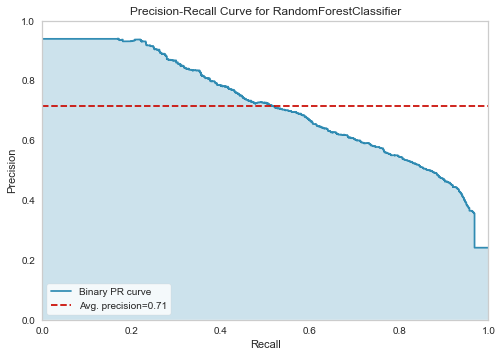

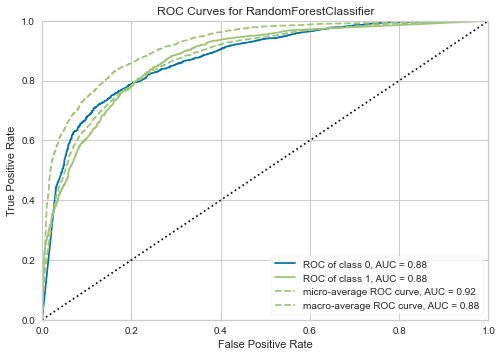

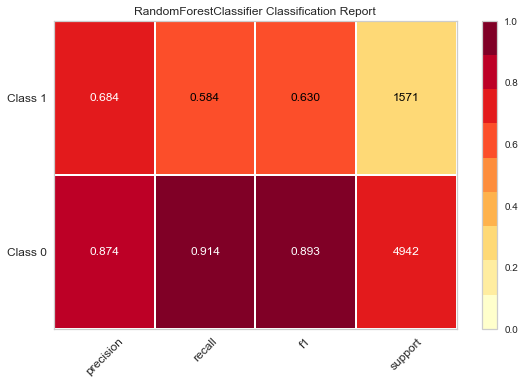

model =  SVC(probability=True, random_state=42)
              precision    recall  f1-score   support

     Class 0       0.86      0.95      0.90      4942
     Class 1       0.76      0.52      0.62      1571

    accuracy                           0.85      6513
   macro avg       0.81      0.74      0.76      6513
weighted avg       0.84      0.85      0.83      6513

Model: SVM
Accuracy: 0.8454
ROC AUC: 0.8768
Classification Report:
 {'Class 0': {'precision': 0.8618723560787199, 'recall': 0.9481991096721974, 'f1-score': 0.9029771654301956, 'support': 4942}, 'Class 1': {'precision': 0.7620817843866171, 'recall': 0.5219605346912795, 'f1-score': 0.6195693237627503, 'support': 1571}, 'accuracy': 0.8453861507753724, 'macro avg': {'precision': 0.8119770702326685, 'recall': 0.7350798221817385, 'f1-score': 0.7612732445964729, 'support': 6513}, 'weighted avg': {'precision': 0.8378018834657469, 'recall': 0.8453861507753724, 'f1-score': 0.8346163917069411, 'support': 6513}}


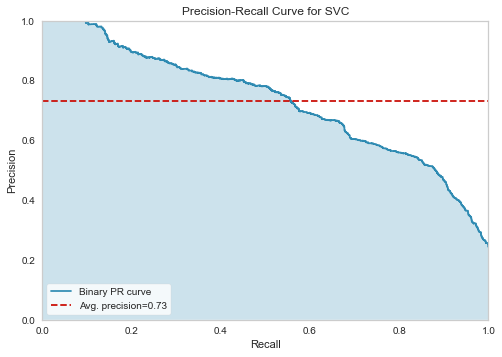

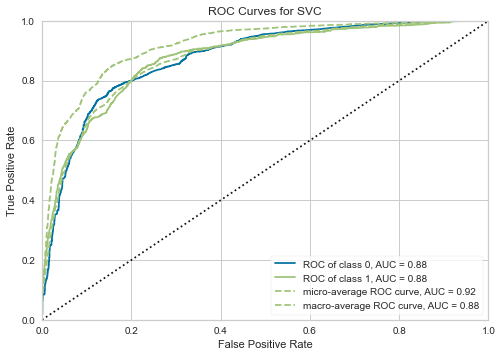

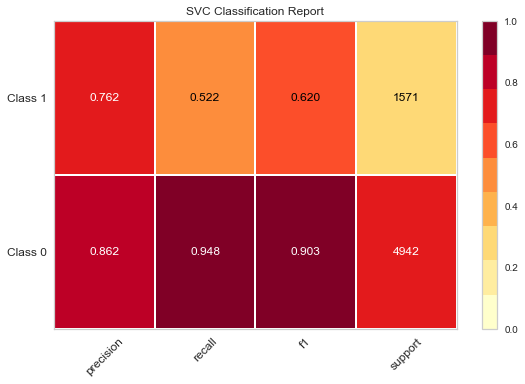

model =  XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)
              precision    recall  f1-score   support

     Class 0       0.88      0.94      0.91      4942
     Class 1       0.75      0.60      0.66      1571

    accuracy                           0.85      6513
   macro avg       0.81      0.77      0.79      6513
weighted avg       

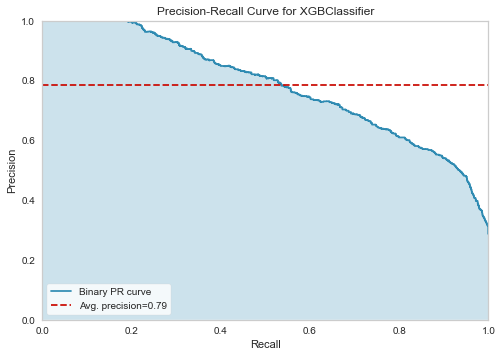

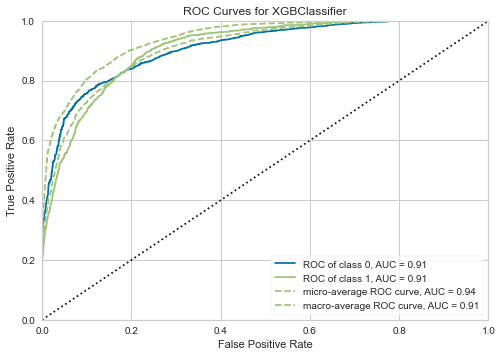

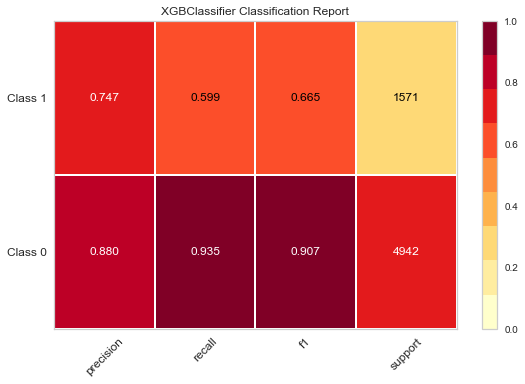

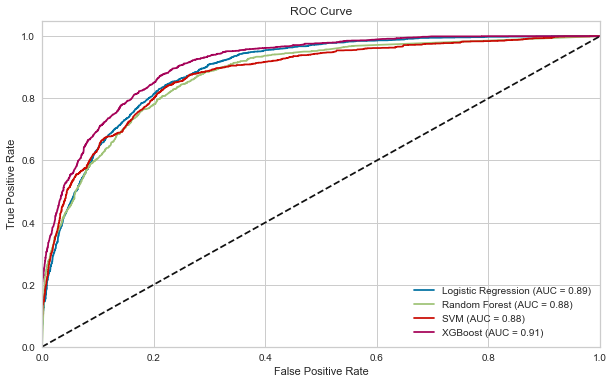

In [32]:
import numpy as np
import pandas as pd  # Import pandas to work with DataFrames
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ClassificationReport

# to adhere to naming convention-
X_train, X_test, y_train, y_test = X_train_transformed, X_val_transformed, y_train, y_val

models = {
    "Logistic Regression": logistic_model,
    "Random Forest": rf_model,
    "SVM": svm_model,
    "XGBoost": xgb_model,
}

# Initialize an empty dictionary to store classification reports
classification_reports = {}

for name, model in models.items():
    print("model = ", model)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of positive class

    # xalculate and print performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    classification_rep = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"], output_dict=False)
    print(classification_rep)
    classification_rep = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"], output_dict=True)

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print("Classification Report:\n", classification_rep)

    # visualize precision and recall
    visualizer = PrecisionRecallCurve(model)
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()

    # visualize ROC AUC
    roc_auc_visualizer = ROCAUC(model)
    roc_auc_visualizer.fit(X_train, y_train)
    roc_auc_visualizer.score(X_test, y_test)
    roc_auc_visualizer.show()

    # visualize classification report
    visualizer = ClassificationReport(model, classes=["Class 0", "Class 1"], support=True)
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()

    # store the classification report in the dictionary with the model name as the key
    classification_reports[name] = pd.DataFrame(classification_rep).transpose()

# compare models using ROC AUC
plt.figure(figsize=(10, 6))
for name, model in models.items():
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [33]:
classification_reports

{'Logistic Regression':               precision    recall  f1-score      support
 Class 0        0.864768  0.927762  0.895158  4942.000000
 Class 1        0.705202  0.543603  0.613947  1571.000000
 accuracy       0.835099  0.835099  0.835099     0.835099
 macro avg      0.784985  0.735682  0.754552  6513.000000
 weighted avg   0.826279  0.835099  0.827327  6513.000000,
 'Random Forest':               precision    recall  f1-score      support
 Class 0        0.873550  0.914205  0.893415  4942.000000
 Class 1        0.683818  0.583705  0.629808  1571.000000
 accuracy       0.834485  0.834485  0.834485     0.834485
 macro avg      0.778684  0.748955  0.761611  6513.000000
 weighted avg   0.827785  0.834485  0.829830  6513.000000,
 'SVM':               precision    recall  f1-score      support
 Class 0        0.861872  0.948199  0.902977  4942.000000
 Class 1        0.762082  0.521961  0.619569  1571.000000
 accuracy       0.845386  0.845386  0.845386     0.845386
 macro avg      0.81197

C:\Users\vivit\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


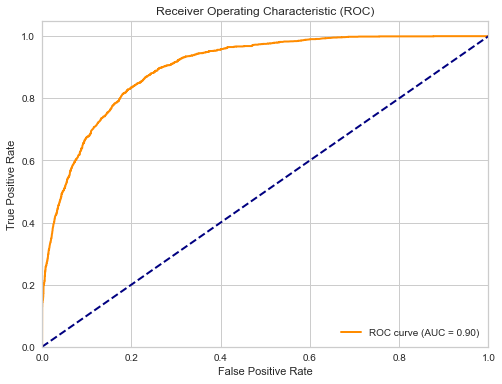

In [34]:
# keras/tf models are not supported by yellow bricks, so performing the same analysis using sklearn

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from keras.wrappers.scikit_learn import KerasClassifier


# make predictions with the model
y_pred_proba = NN_model.predict_proba(X_test)  # Probability of positive class

# calculate ROC curve and ROC AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# visualize ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


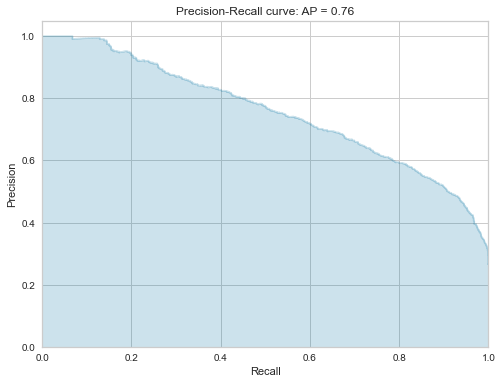

In [35]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# calculate precision-recall curve and average precision score
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
average_precision = average_precision_score(y_test, y_pred_proba)

# visualize Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'Precision-Recall curve: AP = {average_precision:.2f}')
plt.show()


In [36]:
from sklearn.metrics import classification_report

# make predictions with your Keras neural network model
y_pred = NN_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# get classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"], output_dict=True)

# convert the classification report to a DataFrame for better formatting
import pandas as pd
report_df = pd.DataFrame(report).transpose()
print("Classification Report:\n", report_df)


Classification Report:
               precision    recall  f1-score      support
Class 0        0.861162  0.947592  0.902312  4942.000000
Class 1        0.759070  0.519414  0.616780  1571.000000
accuracy       0.844311  0.844311  0.844311     0.844311
macro avg      0.810116  0.733503  0.759546  6513.000000
weighted avg   0.836536  0.844311  0.833439  6513.000000


In [37]:
classification_reports["Neural Network"] = report_df
classification_reports


{'Logistic Regression':               precision    recall  f1-score      support
 Class 0        0.864768  0.927762  0.895158  4942.000000
 Class 1        0.705202  0.543603  0.613947  1571.000000
 accuracy       0.835099  0.835099  0.835099     0.835099
 macro avg      0.784985  0.735682  0.754552  6513.000000
 weighted avg   0.826279  0.835099  0.827327  6513.000000,
 'Random Forest':               precision    recall  f1-score      support
 Class 0        0.873550  0.914205  0.893415  4942.000000
 Class 1        0.683818  0.583705  0.629808  1571.000000
 accuracy       0.834485  0.834485  0.834485     0.834485
 macro avg      0.778684  0.748955  0.761611  6513.000000
 weighted avg   0.827785  0.834485  0.829830  6513.000000,
 'SVM':               precision    recall  f1-score      support
 Class 0        0.861872  0.948199  0.902977  4942.000000
 Class 1        0.762082  0.521961  0.619569  1571.000000
 accuracy       0.845386  0.845386  0.845386     0.845386
 macro avg      0.81197

The best model is 'XGBoost' with an accuracy of 0.8479


In [39]:
from itertools import combinations

def find_best_models(classification_reports, metric_combinations):
    best_models = {}

    # iterate through each of the metric combinations
    for metrics in metric_combinations:
        best_model_name = None
        best_accuracy = 0.0

        # iterate through the classification reports in the dictionary
        for model_name, report_df in classification_reports.items():
            accuracy = report_df.loc[metrics]

            # check if this model has a higher accuracy than the current best
            if accuracy > best_accuracy:
                best_model_name = model_name
                best_accuracy = accuracy

        # store the best model for this combination of metrics in the dictionary
        best_models[metrics] = (best_model_name, best_accuracy)

    return best_models

# testing some combinations for metrics
metric_combinations = [("weighted avg", "precision"), ("weighted avg", "recall"),
                       ("macro avg", "f1-score"),("accuracy", "support")]

best_models = find_best_models(classification_reports, metric_combinations)

# print the best models for each combination
for metrics, (best_model_name, best_accuracy) in best_models.items():
    print(f"Best model for metrics {metrics}: '{best_model_name}' with an accuracy of {best_accuracy:.4f}")


Best model for metrics ('weighted avg', 'precision'): 'XGBoost' with an accuracy of 0.8479
Best model for metrics ('weighted avg', 'recall'): 'XGBoost' with an accuracy of 0.8543
Best model for metrics ('macro avg', 'f1-score'): 'XGBoost' with an accuracy of 0.7858
Best model for metrics ('accuracy', 'support'): 'XGBoost' with an accuracy of 0.8543


In [40]:
best_model = xgb_model

In [41]:
# get test set 
# Perform one-hot encoding on discrete features
target_col_name = 'income_ >50K.'
testset_encoded = one_hot_encode_discrete_features(test, non_continuous_columns)
y_test = testset_encoded[target_col_name]
X_test = testset_encoded
X_test_transformed = transform_X_test(X_test,selected_features)
print(X_test_transformed.shape, y_test.shape)

# Predict on the test set
y_pred = best_model.predict(X_test_transformed)
# get scores and accuracies for test set
classification_rep = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"],
                                           output_dict=False)
print(classification_rep)

(16281, 5) (16281,)
              precision    recall  f1-score   support

     Class 0       0.88      0.93      0.91     12435
     Class 1       0.73      0.60      0.65      3846

    accuracy                           0.85     16281
   macro avg       0.80      0.76      0.78     16281
weighted avg       0.85      0.85      0.85     16281

